# We import the file and have a look at the Data

In [56]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

penguins = pd.read_csv('RandomNames700.csv')

penguins.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


# We add an attribute to check whether we know the Sex or not

In [57]:
penguins['sex_known'] = np.where(penguins['sex'].isnull(), 0, 1)
penguins.head()


,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex,sex_known
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE,1
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE,1
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE,1
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,0
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE,1


# We make the sex as binary ( 0 and 1)

In [58]:
gender_num = {'MALE': 0, 'FEMALE': 1}

penguins['sex'] = penguins['sex'].map(gender_num)
penguins.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex,sex_known
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,0.0,1
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,1.0,1
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,1.0,1
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,0
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,1.0,1


# We make the island as numbers

In [59]:
island_num = {'Torgersen': 0, 'Biscoe': 1, 'Dream': 2}

penguins['island'] = penguins['island'].map(island_num)
penguins.head(50)

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex,sex_known
0,Adelie,0,39.1,18.7,181.0,3750.0,0.0,1
1,Adelie,0,39.5,17.4,186.0,3800.0,1.0,1
2,Adelie,0,40.3,18.0,195.0,3250.0,1.0,1
3,Adelie,0,NaN,NaN,NaN,NaN,NaN,0
4,Adelie,0,36.7,19.3,193.0,3450.0,1.0,1
5,Adelie,0,39.3,20.6,190.0,3650.0,0.0,1
6,Adelie,0,38.9,17.8,181.0,3625.0,1.0,1
7,Adelie,0,39.2,19.6,195.0,4675.0,0.0,1
8,Adelie,0,34.1,18.1,193.0,3475.0,NaN,0
9,Adelie,0,42.0,20.2,190.0,4250.0,NaN,0


In [93]:
penguinsCleaned = pd.read_csv('penguins_cleaned.csv')
penguinsCleaned.dropna()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex,sex_known
0,Adelie,0,39.1,18.7,181.0,3750.0,0.0,1
1,Adelie,0,39.5,17.4,186.0,3800.0,1.0,1
2,Adelie,0,40.3,18.0,195.0,3250.0,1.0,1
4,Adelie,0,36.7,19.3,193.0,3450.0,1.0,1
5,Adelie,0,39.3,20.6,190.0,3650.0,0.0,1
...,...,...,...,...,...,...,...,...
338,Gentoo,1,47.2,13.7,214.0,4925.0,1.0,1
340,Gentoo,1,46.8,14.3,215.0,4850.0,1.0,1
341,Gentoo,1,50.4,15.7,222.0,5750.0,0.0,1
342,Gentoo,1,45.2,14.8,212.0,5200.0,1.0,1


# We drop the rows which contain NaN 

In [97]:
penguinsCleaned = penguinsCleaned.dropna()


In [100]:
penguinsCleaned.to_csv('penguins_dropped_cleaned.csv', index=False)


# We do a 60-20-20 split for the dataset

In [101]:
from sklearn.model_selection import train_test_split
features = penguinsCleaned.drop('species', axis=1)
labels = penguinsCleaned['species']

X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.4, random_state=42)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5, random_state=42)


In [102]:
features

,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex,sex_known
0,0,39.1,18.7,181.0,3750.0,0.0,1
1,0,39.5,17.4,186.0,3800.0,1.0,1
2,0,40.3,18.0,195.0,3250.0,1.0,1
4,0,36.7,19.3,193.0,3450.0,1.0,1
5,0,39.3,20.6,190.0,3650.0,0.0,1
...,...,...,...,...,...,...,...
338,1,47.2,13.7,214.0,4925.0,1.0,1
340,1,46.8,14.3,215.0,4850.0,1.0,1
341,1,50.4,15.7,222.0,5750.0,0.0,1
342,1,45.2,14.8,212.0,5200.0,1.0,1


In [103]:
labels

0      Adelie
1      Adelie
2      Adelie
4      Adelie
5      Adelie
        ...  
338    Gentoo
340    Gentoo
341    Gentoo
342    Gentoo
343    Gentoo
Name: species, Length: 333, dtype: object

In [104]:
X_train

,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex,sex_known
28,1,37.9,18.6,172.0,3150.0,1.0,1
42,2,36.0,18.5,186.0,3100.0,1.0,1
253,1,59.6,17.0,230.0,6050.0,0.0,1
73,0,45.8,18.9,197.0,4150.0,0.0,1
273,1,50.1,15.0,225.0,5000.0,0.0,1
...,...,...,...,...,...,...,...
194,2,50.9,19.1,196.0,3550.0,0.0,1
77,0,37.2,19.4,184.0,3900.0,0.0,1
112,1,39.7,17.7,193.0,3200.0,1.0,1
277,1,45.5,15.0,220.0,5000.0,0.0,1


In [105]:
X_val

,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex,sex_known
85,2,41.3,20.3,194.0,3550.0,0.0,1
66,1,35.5,16.2,195.0,3350.0,1.0,1
181,2,52.8,20.0,205.0,4550.0,0.0,1
282,1,45.7,13.9,214.0,4400.0,1.0,1
178,2,50.5,18.4,200.0,3400.0,1.0,1
...,...,...,...,...,...,...,...
117,0,37.3,20.5,199.0,3775.0,0.0,1
124,0,35.2,15.9,186.0,3050.0,1.0,1
320,1,48.5,15.0,219.0,4850.0,1.0,1
296,1,47.5,14.2,209.0,4600.0,1.0,1


In [68]:
X_test

,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex,sex_known
132,2,36.8,18.5,193.0,3500.0,1.0,1
195,2,45.5,17.0,196.0,3500.0,1.0,1
118,0,35.7,17.0,189.0,3350.0,1.0,1
39,2,39.8,19.1,184.0,4650.0,0.0,1
179,2,49.5,19.0,200.0,3800.0,0.0,1
...,...,...,...,...,...,...,...
7,0,39.2,19.6,195.0,4675.0,0.0,1
277,1,45.5,15.0,220.0,5000.0,0.0,1
300,1,49.1,14.5,212.0,4625.0,1.0,1
287,1,49.5,16.2,229.0,5800.0,0.0,1


# As we can see from above and below that the data is split

In [106]:
for dataset in [y_train, y_val, y_test]:
    print(round(len(dataset) / len(labels), 2))

0.6
0.2
0.2


In [107]:
X_train.to_csv('train_features60.csv', index=False)
X_val.to_csv('val_features20.csv', index=False)
X_test.to_csv('test_features20.csv', index=False)

y_train.to_csv('train_labels60.csv', index=False)
y_val.to_csv('val_labels20.csv', index=False)
y_test.to_csv('test_labels20.csv', index=False)

In [108]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [137]:
rf = RandomForestClassifier()

scores_cross_val = cross_val_score(rf, X_train, y_train.values.ravel(), cv=5)

In [138]:
scores_cross_val

array([0.975, 1.   , 0.975, 1.   , 1.   ])

As we can see from above while doing the cross validation on the dataset, we can see that 3 of the cv give a score of 100% while the other 2 give a 97.5%. These are pretty good scores as they can show the model can be trained well for 3 instances of the cv. 

# Hyperparameter Tuning ( Finding the best Hyperparameters for the model)

In [139]:
def print_results(results):
    print('BEST PARAMS: {}\n'.format(results.best_params_))

    means = results.cv_results_['mean_test_score']
    stds = results.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, results.cv_results_['params']):
        print('{} (+/-{}) for {}'.format(round(mean, 3), round(std * 2, 3), params))
        

In [140]:
from sklearn.model_selection import GridSearchCV

rf = RandomForestClassifier()
parameters = {
    'n_estimators': [5, 50, 100],
    'max_depth': [2, 10, 20, None]
}

cv = GridSearchCV(rf, parameters, cv=5)
cv.fit(X_train, y_train.values.ravel())

print_results(cv)

BEST PARAMS: {'max_depth': 20, 'n_estimators': 100}

0.945 (+/-0.102) for {'max_depth': 2, 'n_estimators': 5}
0.97 (+/-0.049) for {'max_depth': 2, 'n_estimators': 50}
0.975 (+/-0.032) for {'max_depth': 2, 'n_estimators': 100}
0.965 (+/-0.068) for {'max_depth': 10, 'n_estimators': 5}
0.99 (+/-0.024) for {'max_depth': 10, 'n_estimators': 50}
0.99 (+/-0.024) for {'max_depth': 10, 'n_estimators': 100}
0.98 (+/-0.037) for {'max_depth': 20, 'n_estimators': 5}
0.99 (+/-0.024) for {'max_depth': 20, 'n_estimators': 50}
1.0 (+/-0.0) for {'max_depth': 20, 'n_estimators': 100}
0.985 (+/-0.04) for {'max_depth': None, 'n_estimators': 5}
0.98 (+/-0.037) for {'max_depth': None, 'n_estimators': 50}
0.99 (+/-0.024) for {'max_depth': None, 'n_estimators': 100}


# BEST PARAMS: {'max_depth': 20, 'n_estimators': 100}

0.945 (+/-0.102) for {'max_depth': 2, 'n_estimators': 5}</br>
0.97 (+/-0.049) for {'max_depth': 2, 'n_estimators': 50}</br>
0.975 (+/-0.032) for {'max_depth': 2, 'n_estimators': 100}</br>
0.965 (+/-0.068) for {'max_depth': 10, 'n_estimators': 5}</br>
-->0.99 (+/-0.024) for {'max_depth': 10, 'n_estimators': 50}</br>
0.99 (+/-0.024) for {'max_depth': 10, 'n_estimators': 100}</br>
0.98 (+/-0.037) for {'max_depth': 20, 'n_estimators': 5}</br>
0.99 (+/-0.024) for {'max_depth': 20, 'n_estimators': 50}</br>
-->1.0 (+/-0.0) for {'max_depth': 20, 'n_estimators': 100}</br>
0.985 (+/-0.04) for {'max_depth': None, 'n_estimators': 5}</br>
0.98 (+/-0.037) for {'max_depth': None, 'n_estimators': 50}</br>
-->0.99 (+/-0.024) for {'max_depth': None, 'n_estimators': 100}</br>

# We use the Top 3 best Parameters and test with the Validation and Test Set

In [226]:
from sklearn.ensemble import RandomForestClassifier

rf1 = RandomForestClassifier(n_estimators=100, max_depth=20)
rf1.fit(X_train, y_train.values.ravel())

rf2 = RandomForestClassifier(n_estimators=50, max_depth=10)
rf2.fit(X_train, y_train.values.ravel())

rf3 = RandomForestClassifier(n_estimators=100, max_depth=None)
rf3.fit(X_train, y_train.values.ravel())

RandomForestClassifier()

In [209]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
import time
tr_features = pd.read_csv('train_features60.csv')
tr_labels = pd.read_csv('train_labels60.csv')

val_features = pd.read_csv('val_features20.csv')
val_labels = pd.read_csv('val_labels20.csv',)

te_features = pd.read_csv('test_features20.csv')
te_labels = pd.read_csv('test_labels20.csv')

for mdl in [rf1, rf2, rf3]:
    start = time.time()
    y_pred = mdl.predict(val_features)
    end = time.time()
    accuracy = round(accuracy_score(val_labels, y_pred), 3)
    precision = round(precision_score(val_labels, y_pred, average= 'macro'), 3)
    recall = round(recall_score(val_labels, y_pred, average= 'macro'), 3)
    print('MAX DEPTH: {} / # OF EST: {} -- Accuracy: {} / Precision: {} / Recall: {} / Latency:{}'.format(mdl.max_depth,
                                                                         mdl.n_estimators,
                                                                         accuracy,
                                                                         precision,
                                                                         recall,round((end-start)*1000, 1)))

MAX DEPTH: 10 / # OF EST: 100 -- Accuracy: 1.0 / Precision: 1.0 / Recall: 1.0 / Latency:14.0
MAX DEPTH: 20 / # OF EST: 100 -- Accuracy: 1.0 / Precision: 1.0 / Recall: 1.0 / Latency:18.9
MAX DEPTH: None / # OF EST: 100 -- Accuracy: 1.0 / Precision: 1.0 / Recall: 1.0 / Latency:17.0


In [227]:
start = time.time()
y_pred = rf1.predict(te_features)
end = time.time()
accuracy = round(accuracy_score(te_labels, y_pred), 3)
precision = round(precision_score(te_labels, y_pred,average= 'macro'), 3)
recall = round(recall_score(te_labels, y_pred, average= 'macro'), 3)
print('MAX DEPTH: {} / # OF EST: {} -- Accuracy: {} / Precision: {} / Recall: {} Latency:{}'.format(rf1.max_depth,
                                                                     rf1.n_estimators,
                                                                     accuracy,
                                                                     precision,
                                                                     recall,round((end-start)*1000, 1)))

MAX DEPTH: 20 / # OF EST: 100 -- Accuracy: 1.0 / Precision: 1.0 / Recall: 1.0 Latency:20.9


### As we can see from above, the validation set performed slightly better for rf1 with a Latency of 18.9 than the test set which has a Latency of 20.9. This makes sense as the data in both the test sets and validation sets are not exactly equal in size. But, in terms of accuracy, they both have a 100% accuracy.


# Plotting the Learning Curve

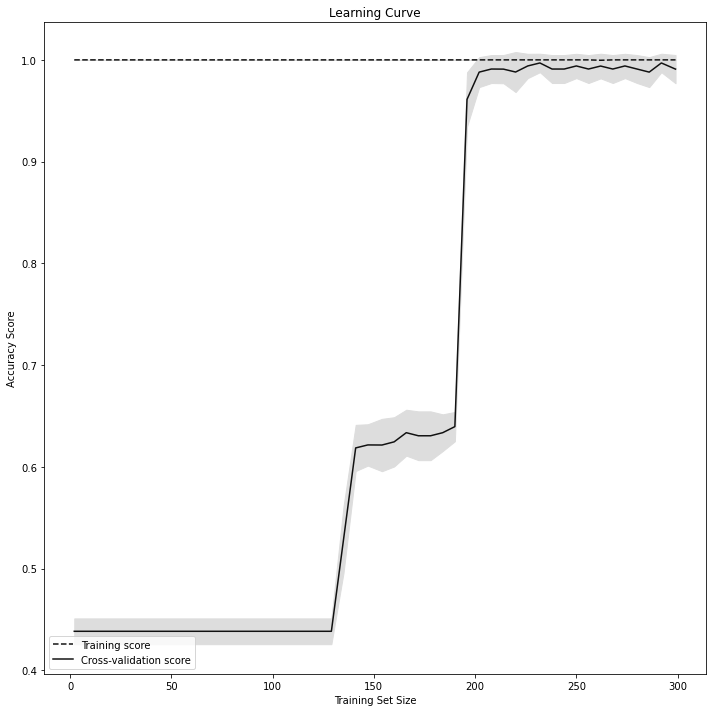

In [162]:
from sklearn.model_selection import learning_curve
from matplotlib import pyplot as plt


estimator = RandomForestClassifier(n_estimators=50, max_depth=10)
train_sizes, train_scores, test_scores = learning_curve(estimator, features, labels, cv=10, scoring='accuracy', n_jobs=-1, train_sizes=np.linspace(0.01, 1.0, 50))
   
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)
    
plt.subplots(1, figsize=(10,10))
plt.plot(train_sizes, train_mean, '--', color="#111111",  label="Training score")
plt.plot(train_sizes, test_mean, color="#111111", label="Cross-validation score")

plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="#DDDDDD")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="#DDDDDD")

plt.title("Learning Curve")
plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
plt.tight_layout()
plt.show()


#### As we can see, The Cross-Validation score increases in accuracy at around 130 samples and then spikes close to the training score accuracy when it is close to 200 samples. But, once it reaches close to the training score, it starts to juggle up and down not maitaining a steady accuracy.

# Logistic Regression ( We follow the same pattern we followed above for the RF to with the data)

In [164]:
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)
warnings.filterwarnings('ignore', category=DeprecationWarning)
lr = LogisticRegression()
parameters = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]
}

cv = GridSearchCV(lr, parameters, cv=5)
cv.fit(X_train, y_train.values.ravel())

print_results(cv)


C:\Users\adam\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\adam\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

C:\Users\adam\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\adam\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

BEST PARAMS: {'C': 1}

0.854 (+/-0.123) for {'C': 0.001}
0.97 (+/-0.037) for {'C': 0.01}
0.985 (+/-0.025) for {'C': 0.1}
0.99 (+/-0.024) for {'C': 1}
0.98 (+/-0.02) for {'C': 10}
0.98 (+/-0.02) for {'C': 100}
0.985 (+/-0.024) for {'C': 1000}


C:\Users\adam\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [165]:
cv.best_estimator_

LogisticRegression(C=1)

# BEST PARAMS: {'C': 1}

0.854 (+/-0.123) for {'C': 0.001}<br>
0.97 (+/-0.037) for {'C': 0.01}<br>
-->0.985 (+/-0.025) for {'C': 0.1}<br>
-->0.99 (+/-0.024) for {'C': 1}<br>
0.98 (+/-0.02) for {'C': 10}<br>
0.98 (+/-0.02) for {'C': 100}<br>
-->0.985 (+/-0.024) for {'C': 1000}<br>

In [215]:
from sklearn.linear_model import LogisticRegression

lr1 = LogisticRegression(C=1)
lr1.fit(X_train, y_train.values.ravel())

lr2 = LogisticRegression(C=0.1)
lr2.fit(X_train, y_train.values.ravel())

lr3 = LogisticRegression(C=1000)
lr3.fit(X_train, y_train.values.ravel())

C:\Users\adam\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\adam\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

LogisticRegression(C=1000)

In [217]:
for mdl in [lr1, lr2, lr3]:
    start = time.time()
    y_pred = mdl.predict(val_features)
    end = time.time()
    accuracy = round(accuracy_score(val_labels, y_pred), 3)
    precision = round(precision_score(val_labels, y_pred, average= 'macro'), 3)
    recall = round(recall_score(val_labels, y_pred, average= 'macro'), 3)
    print('C: {}  -- Accuracy: {} / Precision: {} / Recall: {} / Latency:{}'.format(mdl.C,accuracy,precision,recall,round((end-start)*1000, 1)))
                                                                 
                                                               

C: 1  -- Accuracy: 0.985 / Precision: 0.972 / Recall: 0.99 / Latency:2.0
C: 0.1  -- Accuracy: 0.97 / Precision: 0.959 / Recall: 0.959 / Latency:1.0
C: 1000  -- Accuracy: 0.97 / Precision: 0.959 / Recall: 0.979 / Latency:2.0


In [218]:
start = time.time()
y_pred = lr1.predict(te_features)
end = time.time()
accuracy = round(accuracy_score(te_labels, y_pred), 3)
precision = round(precision_score(te_labels, y_pred,average= 'macro'), 3)
recall = round(recall_score(te_labels, y_pred, average= 'macro'), 3)
print('C: {} /  -- Accuracy: {} / Precision: {} / Recall: {} Latency:{}'.format(lr1.C,
                                                                    
                                                                     accuracy,
                                                                     precision,
                                                                     recall,round((end-start)*1000, 1)))

C: 1 /  -- Accuracy: 1.0 / Precision: 1.0 / Recall: 1.0 Latency:2.0


#### As we can see from the logistic regression model, we can see that the test set peformed better in accuracy, precision and Recall. This is a much better improvement as it gives a 100% for the test set than the validation set. This could also tell us that the test set is closely similar to the training set than the validation set 

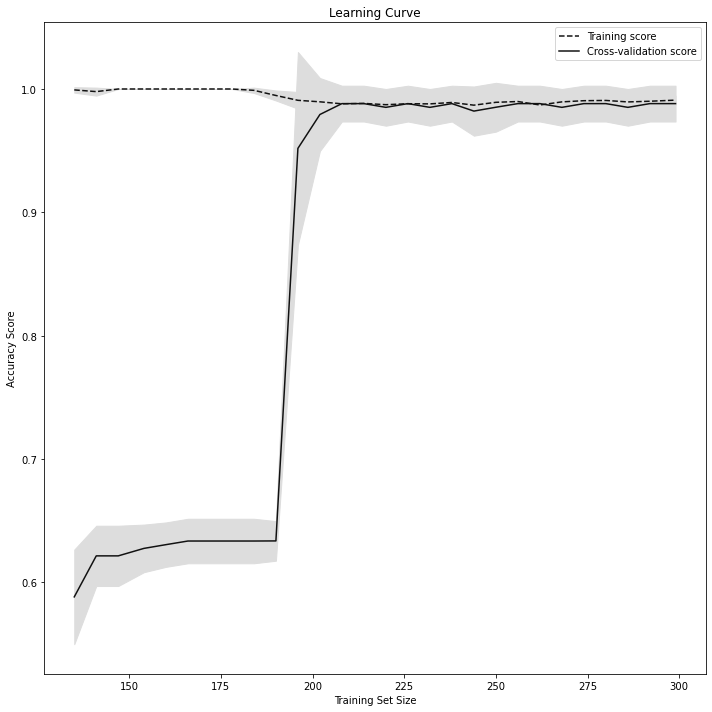

In [172]:
estimator = LogisticRegression(C=1)
train_sizes, train_scores, test_scores = learning_curve(estimator, features, labels, cv=10, scoring='accuracy', n_jobs=-1, train_sizes=np.linspace(0.01, 1.0, 50))
   
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)
    
plt.subplots(1, figsize=(10,10))
plt.plot(train_sizes, train_mean, '--', color="#111111",  label="Training score")
plt.plot(train_sizes, test_mean, color="#111111", label="Cross-validation score")

plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="#DDDDDD")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="#DDDDDD")

plt.title("Learning Curve")
plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
plt.tight_layout()
plt.show()

#### From the graph above, we can see that the logistic regression graph has a good performance since it is almost at 100 percent accuracy. But, we can also see that the training score is a bit shaky as the sample size increases. The training score decreases in accuracy as the sample size increases. From this, we can predict that if we continue to keep adding samples, it will decrease in generalization thus bad for the model.

# Support Vector Machines

In [181]:
from sklearn.svm import SVC

svc = SVC()
parameters = {
    'kernel': ['linear', 'rbf'],
    'C': [0.1, 1, 10]
}

cv = GridSearchCV(svc, parameters, cv=5)
cv.fit(X_train, y_train.values.ravel())

print_results(cv)

BEST PARAMS: {'C': 0.1, 'kernel': 'linear'}

0.985 (+/-0.04) for {'C': 0.1, 'kernel': 'linear'}
0.709 (+/-0.161) for {'C': 0.1, 'kernel': 'rbf'}
0.98 (+/-0.037) for {'C': 1, 'kernel': 'linear'}
0.719 (+/-0.095) for {'C': 1, 'kernel': 'rbf'}
0.98 (+/-0.037) for {'C': 10, 'kernel': 'linear'}
0.719 (+/-0.095) for {'C': 10, 'kernel': 'rbf'}



# BEST PARAMS: {'C': 0.1, 'kernel': 'linear'}

--> 0.985 (+/-0.04) for {'C': 0.1, 'kernel': 'linear'}<br>
0.709 (+/-0.161) for {'C': 0.1, 'kernel': 'rbf'}<br>
--> 0.98 (+/-0.037) for {'C': 1, 'kernel': 'linear'}<br>
0.719 (+/-0.095) for {'C': 1, 'kernel': 'rbf'}<br>
--> 0.98 (+/-0.037) for {'C': 10, 'kernel': 'linear'}<br>
0.719 (+/-0.095) for {'C': 10, 'kernel': 'rbf'}<br>

In [220]:
sv1 = SVC(C=0.1, kernel = 'linear')
sv1.fit(X_train, y_train.values.ravel())

sv2 = SVC(C=1, kernel='linear')
sv2.fit(X_train, y_train.values.ravel())

sv3 = SVC(C=10, kernel = 'linear')
sv3.fit(X_train, y_train.values.ravel())

SVC(C=10, kernel='linear')

In [221]:
for mdl in [sv1, sv2, sv3]:
    start = time.time()
    y_pred = mdl.predict(val_features)
    end = time.time()
    accuracy = round(accuracy_score(val_labels, y_pred), 3)
    precision = round(precision_score(val_labels, y_pred, average= 'macro'), 3)
    recall = round(recall_score(val_labels, y_pred, average= 'macro'), 3)
    print('C: {} / kernel:{}  -- Accuracy: {} / Precision: {} / Recall: {} / Latency:{}'.format(mdl.C,mdl.kernel,accuracy,precision,recall,round((end-start)*1000, 1)))
                                                                 
                                                               

C: 0.1 / kernel:linear  -- Accuracy: 1.0 / Precision: 1.0 / Recall: 1.0 / Latency:2.0
C: 1 / kernel:linear  -- Accuracy: 1.0 / Precision: 1.0 / Recall: 1.0 / Latency:3.0
C: 10 / kernel:linear  -- Accuracy: 1.0 / Precision: 1.0 / Recall: 1.0 / Latency:1.0


In [222]:
start = time.time()
y_pred = sv1.predict(te_features)
end = time.time()
accuracy = round(accuracy_score(te_labels, y_pred), 3)
precision = round(precision_score(te_labels, y_pred,average= 'macro'), 3)
recall = round(recall_score(te_labels, y_pred, average= 'macro'), 3)
print('C: {} / kernel: {} -- Accuracy: {} / Precision: {} / Recall: {} Latency:{}'.format(sv1.C,
                                                                     sv1.C,
                                                                     accuracy,
                                                                     precision,
                                                                     recall,round((end-start)*1000, 1)))

C: 0.1 / kernel: 0.1 -- Accuracy: 1.0 / Precision: 1.0 / Recall: 1.0 Latency:2.0


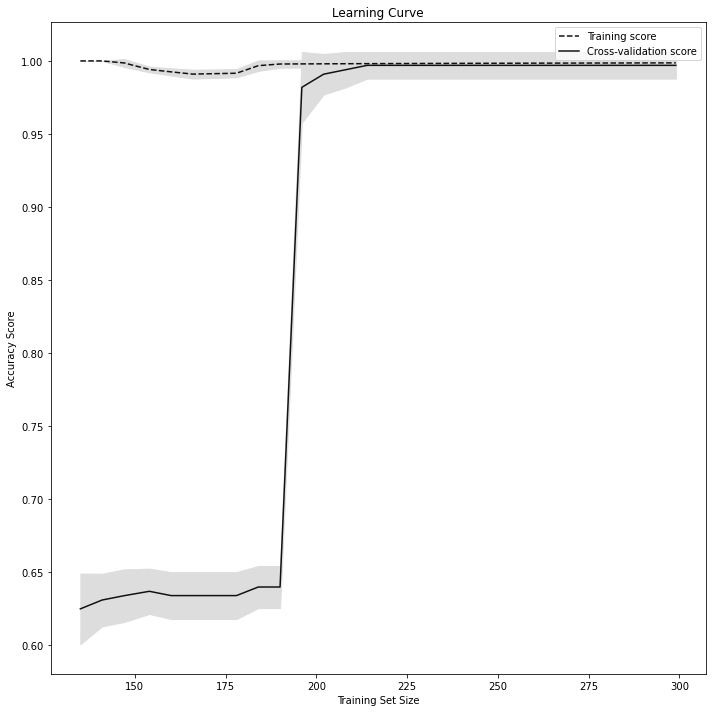

In [187]:
estimator = SVC(C=0.1,kernel='linear')
train_sizes, train_scores, test_scores = learning_curve(estimator, features, labels, cv=10, scoring='accuracy', n_jobs=-1, train_sizes=np.linspace(0.01, 1.0, 50))
   
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)
    
plt.subplots(1, figsize=(10,10))
plt.plot(train_sizes, train_mean, '--', color="#111111",  label="Training score")
plt.plot(train_sizes, test_mean, color="#111111", label="Cross-validation score")

plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="#DDDDDD")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="#DDDDDD")

plt.title("Learning Curve")
plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
plt.tight_layout()
plt.show()

### As we can see from above, Once the training sample size reaches close to 225, both the training score and the cross validation score have a perfect 100% accuracy which is extremely good. 

# To Sum up for the 60-20-20 split, we can see that for the RF model, we had a good learning graph but the cross validation score starts to juggle around near the top when it reaches close to 100% accuracy. For the Logistic regression, we can see that the training score isn't 100% and decreases as sample size increases which can show that that. From this we can also predict that the cross validation score will also decrease once sample size increases, thus underfitting. Finally, the SVM model has a steady training and validation score as the sample size increases with an accuracy of 100% showing that this is the best model.

# 80-10-10 Split ( We follow the same procedure we did for the 60-20-20) model

In [237]:
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

In [189]:
X_train

,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex,sex_known
230,1,40.9,13.7,214.0,4650.0,1.0,1
84,2,37.3,17.8,191.0,3350.0,1.0,1
303,1,50.0,15.9,224.0,5350.0,0.0,1
22,1,35.9,19.2,189.0,3800.0,1.0,1
29,1,40.5,18.9,180.0,3950.0,0.0,1
...,...,...,...,...,...,...,...
194,2,50.9,19.1,196.0,3550.0,0.0,1
77,0,37.2,19.4,184.0,3900.0,0.0,1
112,1,39.7,17.7,193.0,3200.0,1.0,1
277,1,45.5,15.0,220.0,5000.0,0.0,1


In [190]:
for dataset in [y_train, y_val, y_test]:
    print(round(len(dataset) / len(labels), 2))

0.8
0.1
0.1


In [191]:
X_train.to_csv('train_features80.csv', index=False)
X_val.to_csv('val_features10.csv', index=False)
X_test.to_csv('test_features10.csv', index=False)

y_train.to_csv('train_labels80.csv', index=False)
y_val.to_csv('val_labels10.csv', index=False)
y_test.to_csv('test_labels10.csv', index=False)

In [192]:
rf = RandomForestClassifier()

scores_cross_val = cross_val_score(rf, X_train, y_train.values.ravel(), cv=5)

In [193]:
scores_cross_val

array([0.98148148, 0.98113208, 0.98113208, 0.98113208, 1.        ])

In [194]:
rf = RandomForestClassifier()
parameters = {
    'n_estimators': [5, 50, 100],
    'max_depth': [2, 10, 20, None]
}

cv = GridSearchCV(rf, parameters, cv=5)
cv.fit(X_train, y_train.values.ravel())

print_results(cv)

BEST PARAMS: {'max_depth': None, 'n_estimators': 100}

0.974 (+/-0.018) for {'max_depth': 2, 'n_estimators': 5}
0.966 (+/-0.028) for {'max_depth': 2, 'n_estimators': 50}
0.977 (+/-0.015) for {'max_depth': 2, 'n_estimators': 100}
0.981 (+/-0.0) for {'max_depth': 10, 'n_estimators': 5}
0.985 (+/-0.015) for {'max_depth': 10, 'n_estimators': 50}
0.989 (+/-0.018) for {'max_depth': 10, 'n_estimators': 100}
0.978 (+/-0.054) for {'max_depth': 20, 'n_estimators': 5}
0.981 (+/-0.024) for {'max_depth': 20, 'n_estimators': 50}
0.989 (+/-0.018) for {'max_depth': 20, 'n_estimators': 100}
0.963 (+/-0.053) for {'max_depth': None, 'n_estimators': 5}
0.989 (+/-0.018) for {'max_depth': None, 'n_estimators': 50}
0.989 (+/-0.03) for {'max_depth': None, 'n_estimators': 100}


# BEST PARAMS: {'max_depth': None, 'n_estimators': 100}

0.974 (+/-0.018) for {'max_depth': 2, 'n_estimators': 5}<br>
0.966 (+/-0.028) for {'max_depth': 2, 'n_estimators': 50}<br>
0.977 (+/-0.015) for {'max_depth': 2, 'n_estimators': 100}<br>
0.981 (+/-0.0) for {'max_depth': 10, 'n_estimators': 5}<br>
0.985 (+/-0.015) for {'max_depth': 10, 'n_estimators': 50}<br>
-->0.989 (+/-0.018) for {'max_depth': 10, 'n_estimators': 100}<br>
0.978 (+/-0.054) for {'max_depth': 20, 'n_estimators': 5}<br>
0.981 (+/-0.024) for {'max_depth': 20, 'n_estimators': 50}<br>
-->0.989 (+/-0.018) for {'max_depth': 20, 'n_estimators': 100}<br>
0.963 (+/-0.053) for {'max_depth': None, 'n_estimators': 5}<br>
0.989 (+/-0.018) for {'max_depth': None, 'n_estimators': 50}<br>
-->0.989 (+/-0.03) for {'max_depth': None, 'n_estimators': 100}<br>

In [223]:
rf1 = RandomForestClassifier(n_estimators=100, max_depth=10)
rf1.fit(X_train, y_train.values.ravel())

rf2 = RandomForestClassifier(n_estimators=100, max_depth=20)
rf2.fit(X_train, y_train.values.ravel())

rf3 = RandomForestClassifier(n_estimators=100, max_depth=None)
rf3.fit(X_train, y_train.values.ravel())

RandomForestClassifier()

In [224]:
tr_features = pd.read_csv('train_features80.csv')
tr_labels = pd.read_csv('train_labels80.csv')

val_features = pd.read_csv('val_features10.csv')
val_labels = pd.read_csv('val_labels10.csv',)

te_features = pd.read_csv('test_features10.csv')
te_labels = pd.read_csv('test_labels10.csv')

for mdl in [rf1, rf2, rf3]:
    start = time.time()
    y_pred = mdl.predict(val_features)
    end = time.time()
    accuracy = round(accuracy_score(val_labels, y_pred), 3)
    precision = round(precision_score(val_labels, y_pred, average= 'macro'), 3)
    recall = round(recall_score(val_labels, y_pred, average= 'macro'), 3)
    print('MAX DEPTH: {} / # OF EST: {} -- Accuracy: {} / Precision: {} / Recall: {} / Latency:{}'.format(mdl.max_depth,
                                                                         mdl.n_estimators,
                                                                         accuracy,
                                                                         precision,
                                                                         recall,round((end-start)*1000, 1)))

MAX DEPTH: 10 / # OF EST: 100 -- Accuracy: 1.0 / Precision: 1.0 / Recall: 1.0 / Latency:15.0
MAX DEPTH: 20 / # OF EST: 100 -- Accuracy: 1.0 / Precision: 1.0 / Recall: 1.0 / Latency:12.9
MAX DEPTH: None / # OF EST: 100 -- Accuracy: 1.0 / Precision: 1.0 / Recall: 1.0 / Latency:21.0


In [228]:
start = time.time()
y_pred = rf3.predict(te_features)
end = time.time()
accuracy = round(accuracy_score(te_labels, y_pred), 3)
precision = round(precision_score(te_labels, y_pred,average= 'macro'), 3)
recall = round(recall_score(te_labels, y_pred, average= 'macro'), 3)
print('MAX DEPTH: {} / # OF EST: {} -- Accuracy: {} / Precision: {} / Recall: {} Latency:{}'.format(rf3.max_depth,
                                                                     rf3.n_estimators,
                                                                     accuracy,
                                                                     precision,
                                                                     recall,round((end-start)*1000, 1)))

MAX DEPTH: None / # OF EST: 100 -- Accuracy: 1.0 / Precision: 1.0 / Recall: 1.0 Latency:19.9


### As we can see from above, the validation and the test set have both similar scores except for Latency. This makes sense as the data is not exaclty equal in size

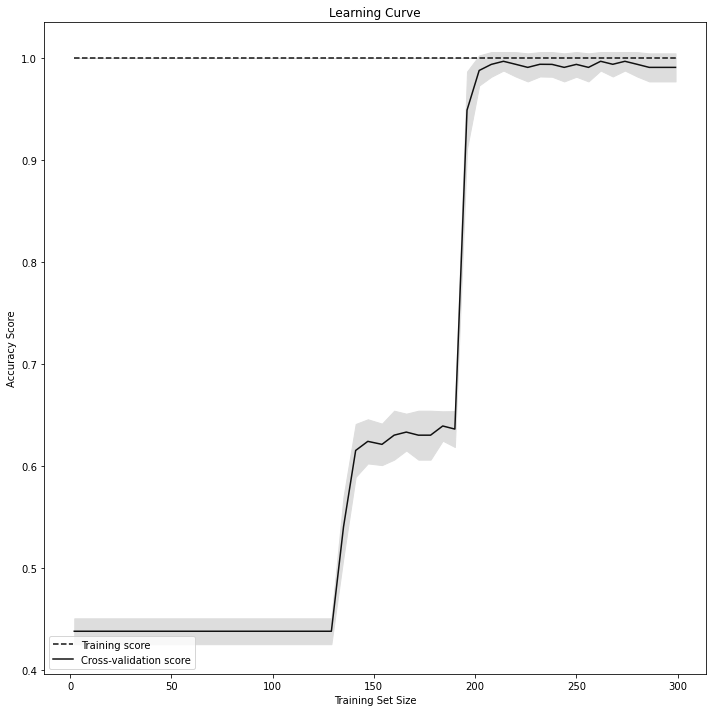

In [197]:

estimator = RandomForestClassifier(n_estimators=100, max_depth=None)
train_sizes, train_scores, test_scores = learning_curve(estimator, features, labels, cv=10, scoring='accuracy', n_jobs=-1, train_sizes=np.linspace(0.01, 1.0, 50))
   
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)
    
plt.subplots(1, figsize=(10,10))
plt.plot(train_sizes, train_mean, '--', color="#111111",  label="Training score")
plt.plot(train_sizes, test_mean, color="#111111", label="Cross-validation score")

plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="#DDDDDD")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="#DDDDDD")

plt.title("Learning Curve")
plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
plt.tight_layout()
plt.show()

### As we can see from the learning curve above, the graph seems almost exactly similar to the learning graph of the RF in the 60-20-20 split

In [198]:
lr = LogisticRegression()
parameters = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]
}

cv = GridSearchCV(lr, parameters, cv=5)
cv.fit(X_train, y_train.values.ravel())

print_results(cv)

C:\Users\adam\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\adam\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

C:\Users\adam\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\adam\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

BEST PARAMS: {'C': 1}

0.887 (+/-0.101) for {'C': 0.001}
0.974 (+/-0.038) for {'C': 0.01}
0.985 (+/-0.028) for {'C': 0.1}
0.989 (+/-0.018) for {'C': 1}
0.981 (+/-0.033) for {'C': 10}
0.985 (+/-0.028) for {'C': 100}
0.985 (+/-0.028) for {'C': 1000}


C:\Users\adam\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\adam\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

# BEST PARAMS: {'C': 1}

0.887 (+/-0.101) for {'C': 0.001}<br>
0.974 (+/-0.038) for {'C': 0.01}<br>
-->0.985 (+/-0.028) for {'C': 0.1}<br>
-->0.989 (+/-0.018) for {'C': 1}<br>
0.981 (+/-0.033) for {'C': 10}<br>
-->0.985 (+/-0.028) for {'C': 100}<br>
0.985 (+/-0.028) for {'C': 1000}<br>

In [229]:
lr1 = LogisticRegression(C=0.1)
lr1.fit(X_train, y_train.values.ravel())

lr2 = LogisticRegression(C=1)
lr2.fit(X_train, y_train.values.ravel())

lr3 = LogisticRegression(C=100)
lr3.fit(X_train, y_train.values.ravel())

C:\Users\adam\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\adam\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

LogisticRegression(C=100)

In [230]:
for mdl in [lr1, lr2, lr3]:
    start = time.time()
    y_pred = mdl.predict(val_features)
    end = time.time()
    accuracy = round(accuracy_score(val_labels, y_pred), 3)
    precision = round(precision_score(val_labels, y_pred, average= 'macro'), 3)
    recall = round(recall_score(val_labels, y_pred, average= 'macro'), 3)
    print('C: {}  -- Accuracy: {} / Precision: {} / Recall: {} / Latency:{}'.format(mdl.C,accuracy,precision,recall,round((end-start)*1000, 1)))
                                                                 
                                                               

C: 0.1  -- Accuracy: 1.0 / Precision: 1.0 / Recall: 1.0 / Latency:2.0
C: 1  -- Accuracy: 1.0 / Precision: 1.0 / Recall: 1.0 / Latency:1.0
C: 100  -- Accuracy: 0.971 / Precision: 0.97 / Recall: 0.978 / Latency:2.0


In [241]:
start = time.time()
y_pred = lr2.predict(te_features)
end = time.time()
accuracy = round(accuracy_score(te_labels, y_pred), 3)
precision = round(precision_score(te_labels, y_pred,average= 'macro'), 3)
recall = round(recall_score(te_labels, y_pred, average= 'macro'), 3)
print('C: {} /  -- Accuracy: {} / Precision: {} / Recall: {} Latency:{}'.format(lr2.C,
                                                                    
                                                                     accuracy,
                                                                     precision,
                                                                     recall,round((end-start)*1000, 1)))

C: 1 /  -- Accuracy: 0.97 / Precision: 0.917 / Recall: 0.979 Latency:3.0


### As we can see from above, when we use the test set to test to the model, all the values decrease. This makes sense because as we concluded from the 60-20-20 split and using the logistic regression on it, we found out that as the training samples size increases, generalization started to decrease. Since we increased our sample size to train in the 80-10-10 model by training 80% of the data, the values accuracy, Precision and Recall decreased when we tested with the testing set.

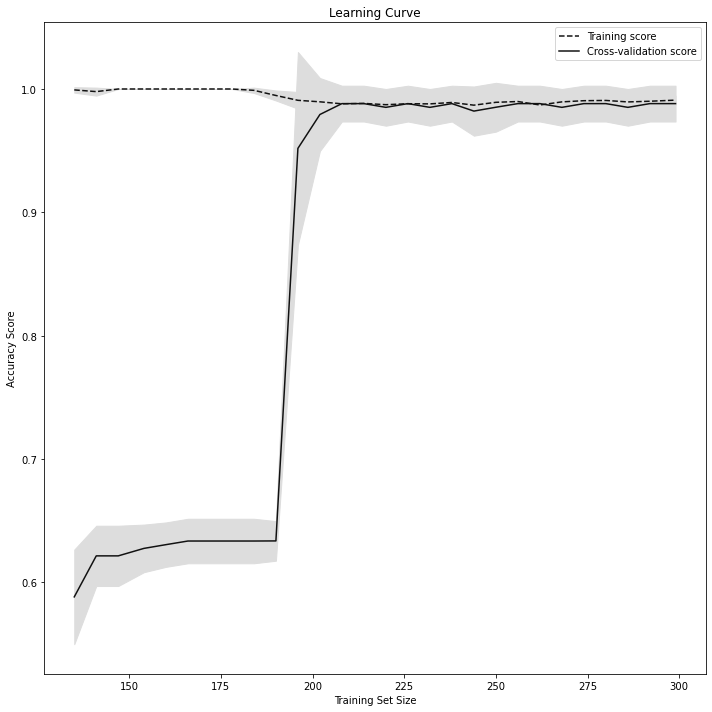

In [201]:
estimator = LogisticRegression(C=1)
train_sizes, train_scores, test_scores = learning_curve(estimator, features, labels, cv=10, scoring='accuracy', n_jobs=-1, train_sizes=np.linspace(0.01, 1.0, 50))
   
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)
    
plt.subplots(1, figsize=(10,10))
plt.plot(train_sizes, train_mean, '--', color="#111111",  label="Training score")
plt.plot(train_sizes, test_mean, color="#111111", label="Cross-validation score")

plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="#DDDDDD")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="#DDDDDD")

plt.title("Learning Curve")
plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
plt.tight_layout()
plt.show()

### This learning curve for the LR is similar to the once we saw before as if we increase the sample size, the accuracy for trainig score decreases and the Cross validation score has small spikes of up and down.

In [240]:
svc = SVC()
parameters = {
    'kernel': ['linear', 'rbf'],
    'C': [0.1, 1, 10]
}

cv = GridSearchCV(svc, parameters, cv=5)
cv.fit(X_train, y_train.values.ravel())

print_results(cv)

BEST PARAMS: {'C': 1, 'kernel': 'linear'}

0.989 (+/-0.03) for {'C': 0.1, 'kernel': 'linear'}
0.722 (+/-0.106) for {'C': 0.1, 'kernel': 'rbf'}
0.992 (+/-0.018) for {'C': 1, 'kernel': 'linear'}
0.722 (+/-0.074) for {'C': 1, 'kernel': 'rbf'}
0.992 (+/-0.018) for {'C': 10, 'kernel': 'linear'}
0.726 (+/-0.085) for {'C': 10, 'kernel': 'rbf'}


# BEST PARAMS: {'C': 1, 'kernel': 'linear'}

-->0.989 (+/-0.03) for {'C': 0.1, 'kernel': 'linear'}<br>
0.722 (+/-0.106) for {'C': 0.1, 'kernel': 'rbf'}<br>
-->0.992 (+/-0.018) for {'C': 1, 'kernel': 'linear'}<br>
0.722 (+/-0.074) for {'C': 1, 'kernel': 'rbf'}<br>
-->0.992 (+/-0.018) for {'C': 10, 'kernel': 'linear'}<br>
0.726 (+/-0.085) for {'C': 10, 'kernel': 'rbf'}<br>

In [238]:
sv1 = SVC(C=0.1, kernel = 'linear')
sv1.fit(X_train, y_train.values.ravel())

sv2 = SVC(C=1, kernel='linear')
sv2.fit(X_train, y_train.values.ravel())

sv3 = SVC(C=10, kernel = 'linear')
sv3.fit(X_train, y_train.values.ravel())

SVC(C=10, kernel='linear')

In [239]:
for mdl in [sv1, sv2, sv3]:
    start = time.time()
    y_pred = mdl.predict(val_features)
    end = time.time()
    accuracy = round(accuracy_score(val_labels, y_pred), 3)
    precision = round(precision_score(val_labels, y_pred, average= 'macro'), 3)
    recall = round(recall_score(val_labels, y_pred, average= 'macro'), 3)
    print('C: {} / kernel:{}  -- Accuracy: {} / Precision: {} / Recall: {} / Latency:{}'.format(mdl.C,mdl.kernel,accuracy,precision,recall,round((end-start)*1000, 1)))
                                                                 
                                                               

C: 0.1 / kernel:linear  -- Accuracy: 1.0 / Precision: 1.0 / Recall: 1.0 / Latency:3.0
C: 1 / kernel:linear  -- Accuracy: 1.0 / Precision: 1.0 / Recall: 1.0 / Latency:3.0
C: 10 / kernel:linear  -- Accuracy: 1.0 / Precision: 1.0 / Recall: 1.0 / Latency:2.0


In [236]:
start = time.time()
y_pred = sv2.predict(te_features)
end = time.time()
accuracy = round(accuracy_score(te_labels, y_pred), 3)
precision = round(precision_score(te_labels, y_pred,average= 'macro'), 3)
recall = round(recall_score(te_labels, y_pred, average= 'macro'), 3)
print('C: {} / kernel: {} -- Accuracy: {} / Precision: {} / Recall: {} Latency:{}'.format(sv2.C,
                                                                     sv2.C,
                                                                     accuracy,
                                                                     precision,
                                                                     recall,round((end-start)*1000, 1)))

C: 1 / kernel: 1 -- Accuracy: 1.0 / Precision: 1.0 / Recall: 1.0 Latency:2.0


### As we can see from above, the values are 100% with extremely low latency. These are really good values as this model is good 

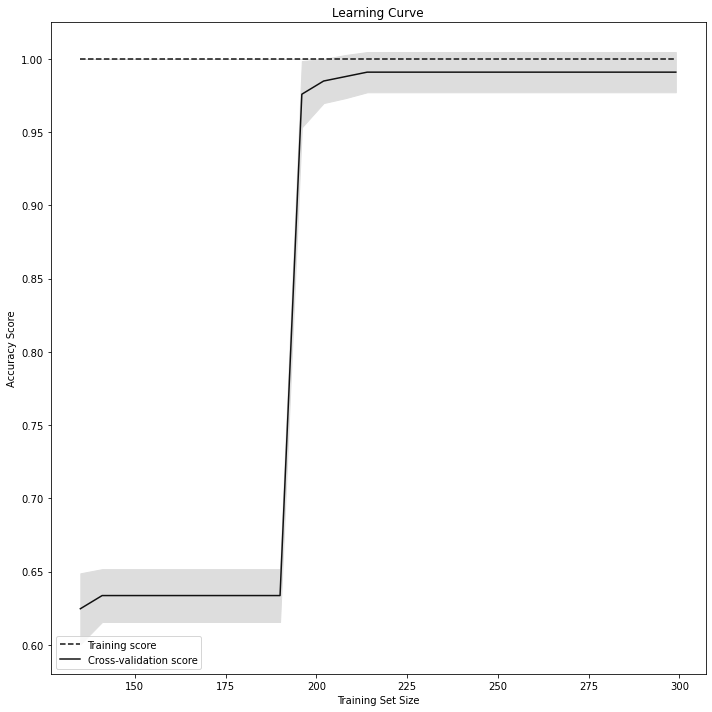

In [242]:
estimator = SVC(C=1,kernel='linear')
train_sizes, train_scores, test_scores = learning_curve(estimator, features, labels, cv=10, scoring='accuracy', n_jobs=-1, train_sizes=np.linspace(0.01, 1.0, 50))
   
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)
    
plt.subplots(1, figsize=(10,10))
plt.plot(train_sizes, train_mean, '--', color="#111111",  label="Training score")
plt.plot(train_sizes, test_mean, color="#111111", label="Cross-validation score")

plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="#DDDDDD")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="#DDDDDD")

plt.title("Learning Curve")
plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
plt.tight_layout()
plt.show()

#### As we can see from this model, it is similar to the model in the 60-20-20 split but the cross-validation is little bit lower. Other than that, both the scores are steady with slight difference. The training score is also steady with a 100% accuracy at the beginning in this learning curve than in that 60-20-20 split which is also. This is also makes sense because the best hyperparameters we found for this graph are different than the hyperparameteres found in the 60-20-20 split.

### To sum it all up, we have found that the best models of both the 80-10-10 and the 60-20-20 split are SVC. Also, regarding the split, we have also found that since 60-20-20 provides more accuracy for both scores, it is also a better split than the 80-10-10.